### 이상치 데이터
* 이상치
    - IQR의 1.5배 또는 3배의 차이가 나면 이상치라고 표현한다
    - 다른 데이터보다 아주 작거나 큰 값을 말한다
    - 데이터를 분석할 때 이상치는 의사결정에 영향을 미칠 수 있다.
* 이상치 처리
    1. 제거
        - 오타, 오류, 비상식적 값들은 단순히 제거한다
    2. 치환
        - 평균, 최빈값, 중앙값(중위수)
* 이상치 구하기
    - 1/4 분위값 25%, 2/4 분위값 중앙값(median), 3/4 분위값 75%
    - IQR = Q3(3사분위) - Q1(1사분위)
    - 최대 이상치 = Q3(3사분위) + IQR * 1.5(3.0)
    - 최저 이상치 = Q1(1사분위) - IQR * 1.5(3.0)

In [2]:
import pandas as pd
df = pd.read_csv('data/food.csv')
df

,food_a,food_b,food_c
0,20,5,5
1,21,6,5
2,23,11,5
3,22,13,12
4,26,15,10
5,120,16,11
6,35,20,20
7,35,20,20
8,41,21,350
9,42,23,20


In [3]:
df.mean()

food_a    47.407407
food_b    51.037037
food_c    42.407407
dtype: float64

In [4]:
df.describe()
#통계값 보여줘

,food_a,food_b,food_c
count,27.000000,27.000000,27.000000
mean,47.407407,51.037037,42.407407
std,20.267935,110.789295,64.268822
min,20.000000,5.000000,5.000000
25%,38.000000,20.000000,20.000000
50%,46.000000,30.000000,31.000000
75%,57.000000,41.500000,45.500000
max,120.000000,600.000000,350.000000


In [7]:
import numpy as np

test_median = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
print('평균 : ', np.mean(test_median))
'중앙값 : ',np.median(test_median)

평균 :  5.5


('중앙값 : ', 5.5)

In [11]:
food_a_median = np.median(df['food_a'])
food_b_median = np.median(df['food_b'])
food_c_median = np.median(df['food_c'])

print('food_a_median : ', food_a_median)
print('food_b_median : ', food_b_median)
print('food_c_median : ', food_c_median)
print('평균 : ',df.mean())

food_a_median :  46.0
food_b_median :  30.0
food_c_median :  31.0
평균 :  food_a    47.407407
food_b    51.037037
food_c    42.407407
dtype: float64


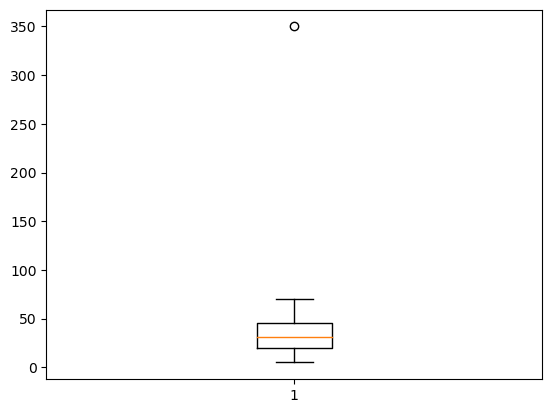

In [15]:
import matplotlib.pyplot as plt
plt.boxplot(df['food_b'])
plt.show()

* 이상치 구하기
    - 1/4 분위값 25%, 2/4 분위값 중앙값(median), 3/4 분위값 75%
    - IQR = Q3(3사분위) - Q1(1사분위)
    - 최대 이상치 = Q3(3사분위) + IQR * 1.5(3.0)
    - 최저 이상치 = Q1(1사분위) - IQR * 1.5(3.0)

In [16]:
test_median = [-4, 2, 3, 4, 5, 6, 7, 8, 9, 15]
df_test = pd.DataFrame(test_median)
df_test

,0
0,-4
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,15


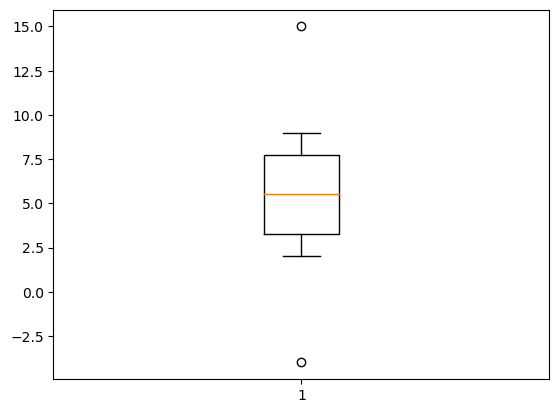

In [17]:
plt.boxplot(df_test[0])
plt.show()

* IQR = Q3(3사분위) - Q1(1사분위)
* 최대 이상치 = Q3(3사분위) + IQR * 1.5(3.0)
* 최저 이상치 = Q1(1사분위) - IQR * 1.5(3.0)

In [18]:
df_test.describe()

,0
count,10.000000
mean,5.500000
std,4.972145
min,-4.000000
25%,3.250000
50%,5.500000
75%,7.750000
max,15.000000


In [22]:
print(df_test.describe().loc['25%'][0])
q1 = df_test.describe().loc['25%'][0]
q1

3.25


3.25

In [28]:
print(df_test[0].describe())
q3 = df_test[0].describe()['75%']
q3

count    10.000000
mean      5.500000
std       4.972145
min      -4.000000
25%       3.250000
50%       5.500000
75%       7.750000
max      15.000000
Name: 0, dtype: float64


7.75

In [33]:
iqr = q3 - q1
lowerfence = q1 - iqr * 1.5 #최저이상치
upperfence = q3 + iqr * 1.5 #최대이상치
print('최저이상치 : ', lowerfence)
print('최대이상치 : ', upperfence)

최저이상치 :  -3.5
최대이상치 :  14.5


In [36]:
df_test[df_test[0]>=lowerfence]

,0
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,15


In [39]:
(df_test[0]>=lowerfence) & (df_test[0]<=upperfence)

0    False
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9    False
Name: 0, dtype: bool

In [41]:
df_test=df_test[(df_test[0]>=lowerfence) & (df_test[0]<=upperfence)]
df_test

,0
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9


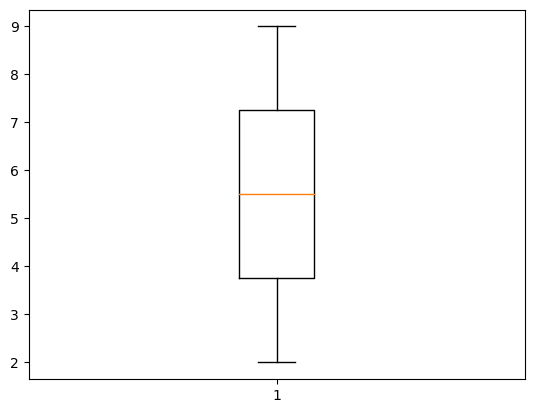

In [42]:
plt.boxplot(df_test[0])
plt.show()

In [43]:
df_test = pd.DataFrame(test_median)
df_test

,0
0,-4
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,15


In [49]:
(df_test[0] > upperfence) | (df_test[0]<lowerfence)

0     True
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9     True
Name: 0, dtype: bool

In [51]:
df_test[(df_test[0] > upperfence) | (df_test[0]<lowerfence)] =\
            df_test[0].describe().loc['50%']

C:\Users\user\AppData\Local\Temp\ipykernel_17740\3570071307.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '5.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_test[(df_test[0] > upperfence) | (df_test[0]<lowerfence)] =\


In [53]:
df_test

,0
0,5.5
1,2.0
2,3.0
3,4.0
4,5.0
5,6.0
6,7.0
7,8.0
8,9.0
9,5.5


In [56]:
df_test.reset_index(drop=True) #인덱스 재정의

,0
0,5.5
1,2.0
2,3.0
3,4.0
4,5.0
5,6.0
6,7.0
7,8.0
8,9.0
9,5.5
